In [ ]:
!pip install keras
!pip install tensorflow
!pip install scikeras

In [ ]:
import numpy as np
from numpy import expand_dims
import pandas as pd
import json
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
import keras
from keras import layers
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras import callbacks
from sklearn import metrics
import seaborn as sns
import tensorflow as tf

In [ ]:
with open('shipsnet.json') as data_file:
    dataset = json.load(data_file)
shipsnet= pd.DataFrame(dataset)
shipsnet.head(1000)

,data,labels,locations,scene_ids
0,"[82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...",1,"[-118.2254694333423, 33.73803725920789]",20180708_180909_0f47
1,"[76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...",1,"[-122.33222866289329, 37.7491755586813]",20170705_180816_103e
2,"[125, 127, 129, 130, 126, 125, 129, 133, 132, ...",1,"[-118.14283073363218, 33.736016066914175]",20180712_211331_0f06
3,"[102, 99, 113, 106, 96, 102, 105, 105, 103, 10...",1,"[-122.34784341495181, 37.76648707436548]",20170609_180756_103a
4,"[78, 76, 74, 78, 79, 79, 79, 82, 86, 85, 83, 8...",1,"[-122.34852408322172, 37.75878462398653]",20170515_180653_1007
...,...,...,...,...
995,"[103, 95, 99, 108, 110, 125, 131, 125, 133, 13...",1,"[-122.34862085843947, 37.767167357603554]",20170921_181406_1031
996,"[75, 75, 75, 75, 74, 70, 69, 72, 73, 72, 70, 6...",1,"[-122.33786604607423, 37.73944613318674]",20170604_180820_0f52
997,"[75, 74, 75, 75, 74, 74, 75, 76, 76, 75, 75, 7...",1,"[-122.33284969739871, 37.71792145705744]",20170721_180825_100b
998,"[49, 50, 49, 45, 49, 53, 52, 46, 43, 44, 49, 5...",1,"[-122.35668820008198, 37.75991104734941]",20170618_180801_0f34


In [ ]:
print(len(shipsnet['data'][0]))

19200


In [ ]:
shipsnet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   data       4000 non-null   object
 1   labels     4000 non-null   int64 
 2   locations  4000 non-null   object
 3   scene_ids  4000 non-null   object
dtypes: int64(1), object(3)
memory usage: 125.1+ KB


In [ ]:
shipsnet = shipsnet[["data","labels"]]
shipsnet.head()

,data,labels
0,"[82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...",1
1,"[76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...",1
2,"[125, 127, 129, 130, 126, 125, 129, 133, 132, ...",1
3,"[102, 99, 113, 106, 96, 102, 105, 105, 103, 10...",1
4,"[78, 76, 74, 78, 79, 79, 79, 82, 86, 85, 83, 8...",1


In [ ]:
ship_images = shipsnet["labels"].value_counts()[0]
no_ship_images = shipsnet["labels"].value_counts()[1]
print("Number of the ship_images :{}".format(ship_images),"\n")
print("Number of the ship_images :{}".format(no_ship_images))

Number of the ship_images :3000 

Number of the ship_images :1000


In [ ]:
x = np.array(dataset['data']).astype('uint8')
y = np.array(dataset['labels']).astype('uint8')

In [ ]:
x.shape

(4000, 19200)

In [ ]:
x

array([[ 82,  89,  91, ...,  86,  88,  89],
       [ 76,  75,  67, ...,  54,  57,  58],
       [125, 127, 129, ..., 111, 109, 115],
       ...,
       [171, 135, 118, ...,  95,  95,  85],
       [ 85,  90,  94, ...,  96,  95,  89],
       [122, 122, 126, ...,  51,  46,  69]], dtype=uint8)

In [ ]:
x_reshaped = x.reshape([-1, 3, 80, 80])

In [ ]:
x_reshaped

array([[[[ 82,  89,  91, ...,  89,  84,  83],
         [ 89,  91,  89, ..., 101,  87,  87],
         [ 91,  93,  86, ...,  83,  90,  92],
         ...,
         [ 89,  88,  92, ...,  88,  85,  89],
         [ 87,  88,  91, ...,  91,  90,  90],
         [ 88,  91,  90, ...,  88,  89,  90]],

        [[ 94,  99, 101, ..., 102,  96,  96],
         [100, 102, 101, ..., 115, 100,  99],
         [101, 104,  98, ...,  96, 102, 102],
         ...,
         [ 98,  98, 102, ...,  99,  97, 100],
         [ 99,  99, 101, ..., 101, 101, 102],
         [ 99, 101, 101, ..., 101, 102, 102]],

        [[ 80,  86,  89, ...,  86,  81,  84],
         [ 86,  88,  89, ...,  97,  84,  86],
         [ 88,  92,  85, ...,  81,  88,  89],
         ...,
         [ 87,  86,  89, ...,  86,  84,  87],
         [ 87,  86,  88, ...,  88,  88,  89],
         [ 85,  87,  87, ...,  86,  88,  89]]],


       [[[ 76,  75,  67, ...,  78,  77,  80],
         [ 71,  73,  72, ...,  79,  77,  81],
         [ 73,  70,  67, ..., 

In [ ]:
x_reshaped[0].shape

(3, 80, 80)

In [ ]:
print(x_reshaped[0][0])

[[ 82  89  91 ...  89  84  83]
 [ 89  91  89 ... 101  87  87]
 [ 91  93  86 ...  83  90  92]
 ...
 [ 89  88  92 ...  88  85  89]
 [ 87  88  91 ...  91  90  90]
 [ 88  91  90 ...  88  89  90]]


In [ ]:
x_reshaped[0][0].shape

(80, 80)

In [ ]:
print(x_reshaped[0][1])

[[ 94  99 101 ... 102  96  96]
 [100 102 101 ... 115 100  99]
 [101 104  98 ...  96 102 102]
 ...
 [ 98  98 102 ...  99  97 100]
 [ 99  99 101 ... 101 101 102]
 [ 99 101 101 ... 101 102 102]]


In [ ]:
print(x_reshaped[0])

[[[ 82  89  91 ...  89  84  83]
  [ 89  91  89 ... 101  87  87]
  [ 91  93  86 ...  83  90  92]
  ...
  [ 89  88  92 ...  88  85  89]
  [ 87  88  91 ...  91  90  90]
  [ 88  91  90 ...  88  89  90]]

 [[ 94  99 101 ... 102  96  96]
  [100 102 101 ... 115 100  99]
  [101 104  98 ...  96 102 102]
  ...
  [ 98  98 102 ...  99  97 100]
  [ 99  99 101 ... 101 101 102]
  [ 99 101 101 ... 101 102 102]]

 [[ 80  86  89 ...  86  81  84]
  [ 86  88  89 ...  97  84  86]
  [ 88  92  85 ...  81  88  89]
  ...
  [ 87  86  89 ...  86  84  87]
  [ 87  86  88 ...  88  88  89]
  [ 85  87  87 ...  86  88  89]]]


In [ ]:
x_reshaped[0][0].shape

(80, 80)

In [ ]:
x_reshaped = x.reshape([-1, 3, 80, 80]).transpose([0,2,3,1])
x_reshaped.shape

(4000, 80, 80, 3)

In [ ]:
print(x_reshaped[0][79])

[[ 88  99  85]
 [ 91 101  87]
 [ 90 101  87]
 [ 88 100  87]
 [ 89  99  88]
 [ 89  99  88]
 [ 86  96  84]
 [ 92 101  89]
 [ 90 100  87]
 [ 87  97  84]
 [ 86  98  84]
 [ 90 102  87]
 [ 89 100  85]
 [ 90 100  86]
 [ 89 100  86]
 [ 87  99  86]
 [ 86  99  85]
 [ 90 102  88]
 [ 90 100  86]
 [ 92 102  89]
 [ 89 100  87]
 [ 89 100  87]
 [ 89 100  88]
 [ 86  97  84]
 [ 84  95  82]
 [ 85  97  85]
 [ 90 100  90]
 [ 90 100  91]
 [ 87  98  88]
 [ 90 100  89]
 [ 86  97  86]
 [ 88  98  87]
 [ 90 101  89]
 [ 88 100  87]
 [ 85  98  85]
 [ 86 100  86]
 [ 86  99  86]
 [ 90 101  88]
 [ 91 101  89]
 [ 90  99  87]
 [ 89  97  86]
 [ 91 100  89]
 [ 90  99  88]
 [ 90 100  89]
 [ 89 100  88]
 [ 89  99  86]
 [ 92 101  87]
 [ 96 104  93]
 [ 91 100  88]
 [ 91 101  89]
 [ 89 101  87]
 [ 86  99  85]
 [ 88  99  87]
 [ 94 103  92]
 [ 93 101  90]
 [ 87  95  83]
 [ 85  95  82]
 [ 93 103  88]
 [ 99 108  93]
 [ 91 101  89]
 [ 90 101  91]
 [ 89 100  91]
 [ 89 100  90]
 [ 92 103  92]
 [ 92 103  94]
 [ 94 103  92]
 [ 91 100 

In [ ]:
x_reshaped[0][4].shape

(80, 3)

In [ ]:
y.shape

(4000,)

In [ ]:
y_reshaped = to_categorical(y, num_classes=2)

y_reshaped.shape

(4000, 2)

In [ ]:
y_reshaped

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

## Exploring the images

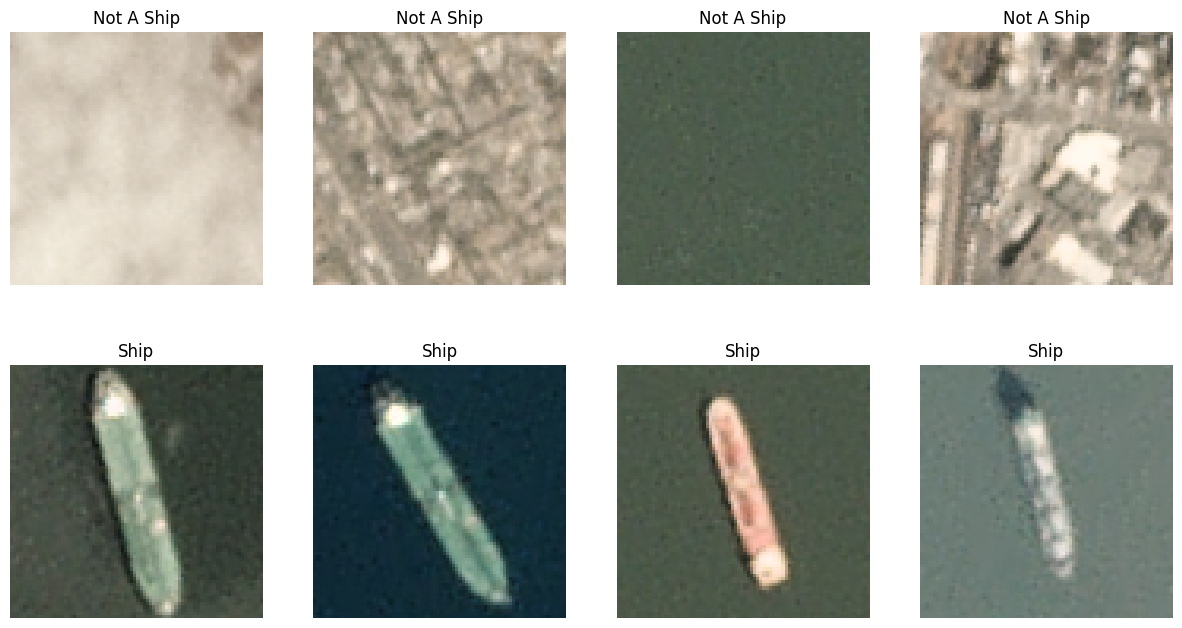

In [ ]:
image_no_ship = x_reshaped[y==0]
image_ship = x_reshaped[y==1]

def plot(a,b):

    plt.figure(figsize=(15, 15))
    for i, k in enumerate(range(1,9)):
        if i < 4:
            plt.subplot(2,4,k)
            plt.title('Not A Ship')
            plt.imshow(image_no_ship[i+2])
            plt.axis("off")
        else:
            plt.subplot(2,4,k)
            plt.title('Ship')
            plt.imshow(image_ship[i+15])
            plt.axis("off")

    plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0.25)

plot(image_no_ship, image_ship)

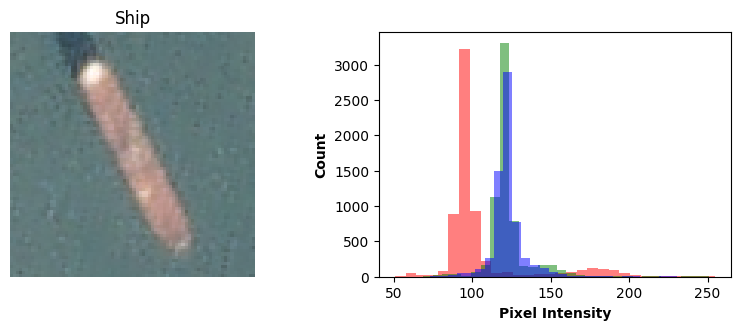

Minimum pixel value of this image: 51
Maximum pixel value of this image: 255


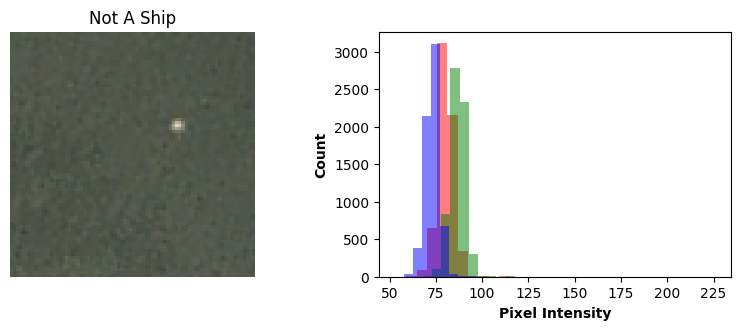

Minimum pixel value of this image: 53
Maximum pixel value of this image: 226


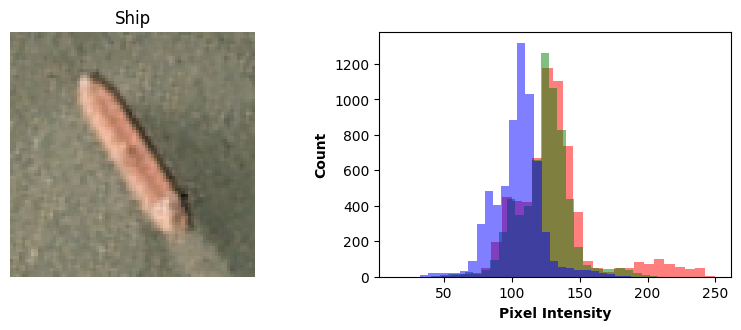

Minimum pixel value of this image: 14
Maximum pixel value of this image: 250


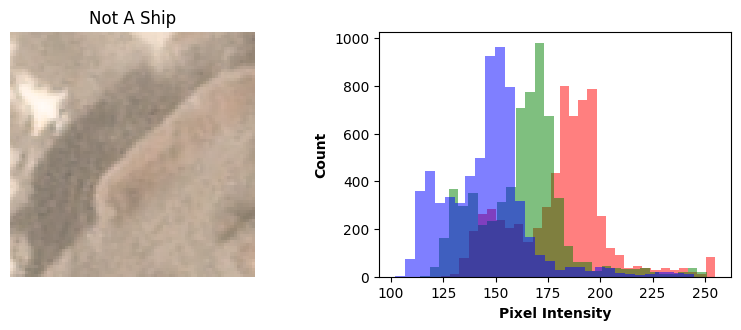

Minimum pixel value of this image: 102
Maximum pixel value of this image: 255


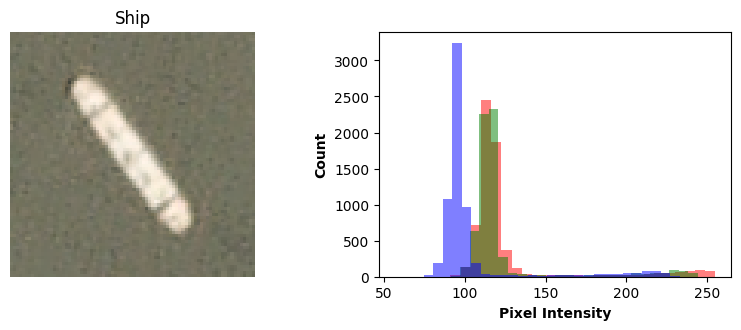

Minimum pixel value of this image: 57
Maximum pixel value of this image: 255


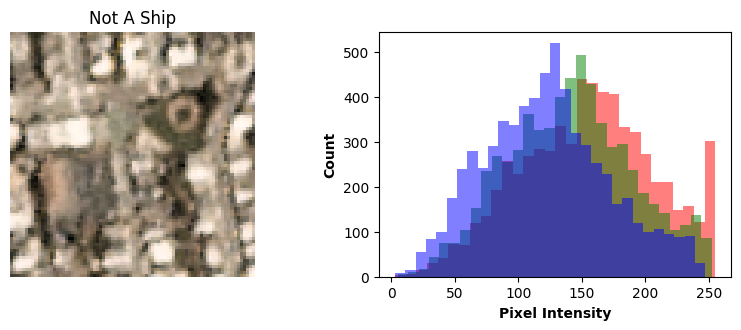

Minimum pixel value of this image: 3
Maximum pixel value of this image: 255


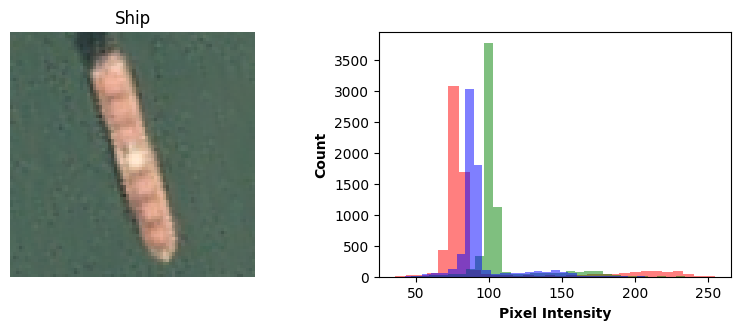

Minimum pixel value of this image: 36
Maximum pixel value of this image: 255


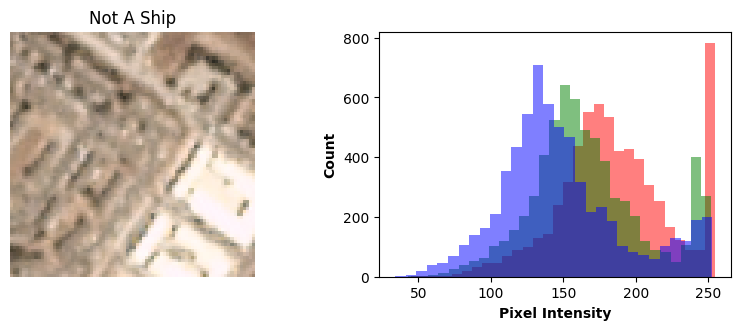

Minimum pixel value of this image: 34
Maximum pixel value of this image: 255


In [ ]:
def plotHistogram(ship, not_ship):

    plt.figure(figsize = (10,7))
    plt.subplot(2,2,1)
    plt.imshow(ship)
    plt.axis('off')
    plt.title('Ship')
    histo = plt.subplot(2,2,2)
    histo.set_ylabel('Count', fontweight = "bold")
    histo.set_xlabel('Pixel Intensity', fontweight = "bold")
    n_bins = 30
    plt.hist(ship[:,:,0].flatten(), bins = n_bins, lw = 0, color = 'r', alpha = 0.5);
    plt.hist(ship[:,:,1].flatten(), bins = n_bins, lw = 0, color = 'g', alpha = 0.5);
    plt.hist(ship[:,:,2].flatten(), bins = n_bins, lw = 0, color = 'b', alpha = 0.5);
    plt.show()
    print("Minimum pixel value of this image: {}".format(ship.min()))
    print("Maximum pixel value of this image: {}".format(ship.max()))
    plt.figure(figsize = (10,7))
    plt.subplot(2,2,3)
    plt.imshow(not_ship)
    plt.axis('off')
    plt.title('Not A Ship')
    histo = plt.subplot(2,2,4)
    histo.set_ylabel('Count', fontweight = "bold")
    histo.set_xlabel('Pixel Intensity', fontweight = "bold")
    n_bins = 30
    plt.hist(not_ship[:,:,0].flatten(), bins = n_bins, lw = 0, color = 'r', alpha = 0.5);
    plt.hist(not_ship[:,:,1].flatten(), bins = n_bins, lw = 0, color = 'g', alpha = 0.5);
    plt.hist(not_ship[:,:,2].flatten(), bins = n_bins, lw = 0, color = 'b', alpha = 0.5);
    plt.show()
    print("Minimum pixel value of this image: {}".format(not_ship.min()))
    print("Maximum pixel value of this image: {}".format(not_ship.max()))

for i in range (10,14):
    plotHistogram(x_reshaped[y==1][i], x_reshaped[y==0][i])

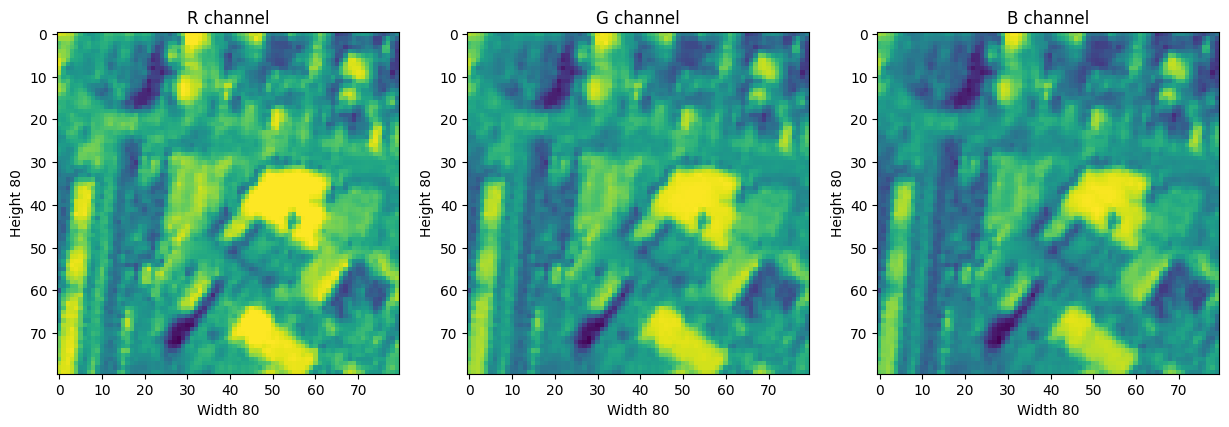

In [ ]:
my_list = [(0, 'R channel'), (1, 'G channel'), (2, 'B channel')]

plt.figure(figsize = (15,15))

for i, k in my_list:
    plt.subplot(1,3,i+1)
    plt.title(k)
    plt.ylabel('Height {}'.format(x_reshaped[y==0][5].shape[0]))
    plt.xlabel('Width {}'.format(x_reshaped[y==0][5].shape[1]))
    plt.imshow(x_reshaped[y==0][5][ : , : , i])

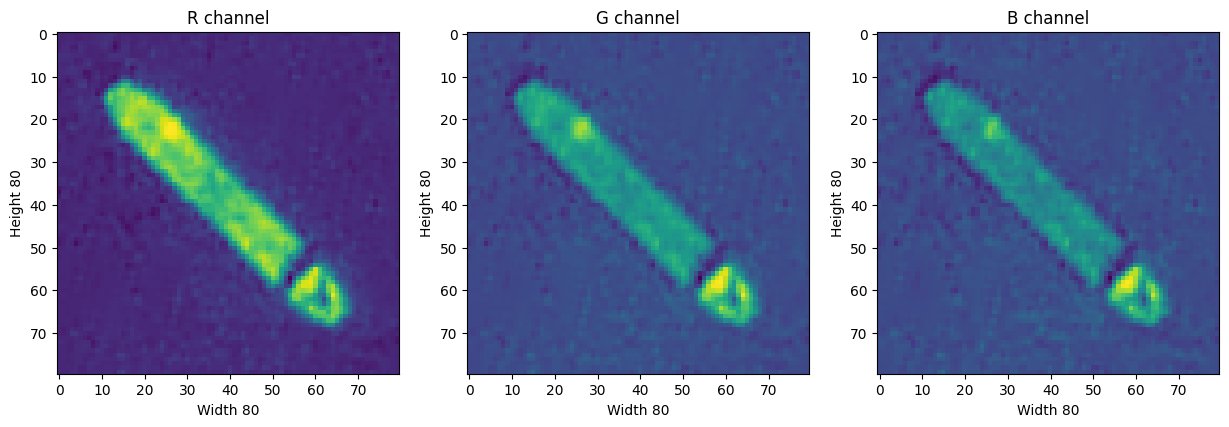

In [ ]:
my_list = [(0, 'R channel'), (1, 'G channel'), (2, 'B channel')]

plt.figure(figsize = (15,15))

for i, k in my_list:
    plt.subplot(1,3,i+1)
    plt.title(k)
    plt.ylabel('Height {}'.format(x_reshaped[y==0][5].shape[0]))
    plt.xlabel('Width {}'.format(x_reshaped[y==0][5].shape[1]))
    plt.imshow(x_reshaped[y==1][5][ : , : , i])

## Modelling

In [ ]:
x_reshaped = x_reshaped / 255

In [ ]:
x_reshaped[0][0][0]

array([0.32156863, 0.36862745, 0.31372549])

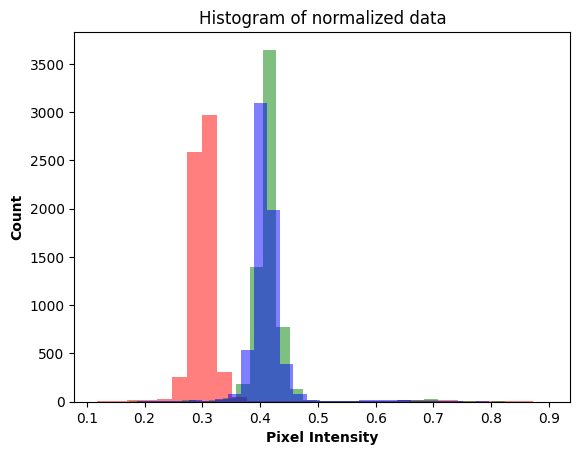

In [ ]:
n_bins = 30
plt.hist(x_reshaped[y == 0][0][:,:,0].flatten(), bins = n_bins, lw = 0, color = 'r', alpha = 0.5);
plt.hist(x_reshaped[y == 0][0][:,:,1].flatten(), bins = n_bins, lw = 0, color = 'g', alpha = 0.5);
plt.hist(x_reshaped[y == 0][0][:,:,2].flatten(), bins = n_bins, lw = 0, color = 'b', alpha = 0.5);
plt.ylabel('Count', fontweight = "bold")
plt.xlabel('Pixel Intensity', fontweight = "bold")
plt.title("Histogram of normalized data")
plt.show()

In [ ]:
x_train_1, x_test, y_train_1, y_test = train_test_split(x_reshaped, y_reshaped,
                                                        test_size = 0.20, random_state = 42)

x_train, x_val, y_train, y_val = train_test_split(x_train_1, y_train_1,
                                                  test_size = 0.25, random_state = 42)

print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)
print("y_train shape",x_val.shape)
print("y_test shape",y_val.shape)
print("x_train_1 shape",x_train_1.shape)
print("x_val shape",x_val.shape)
print("y_train_1 shape",y_train_1.shape)

x_train shape (2400, 80, 80, 3)
x_test shape (800, 80, 80, 3)
y_train shape (2400, 2)
y_test shape (800, 2)
y_train shape (800, 80, 80, 3)
y_test shape (800, 2)
x_train_1 shape (3200, 80, 80, 3)
x_val shape (800, 80, 80, 3)
y_train_1 shape (3200, 2)


In [ ]:
x_test.shape

(800, 80, 80, 3)

In [ ]:
x_train.shape

(2400, 80, 80, 3)

## ANN

In [ ]:
from keras import callbacks
model = Sequential()
model.add(Flatten(input_shape=[80, 80, 3]))
model.add(Dense(200, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
earlystopping = callbacks.EarlyStopping(monitor ="val_loss",
                                        mode ="min", patience = 10,
                                        restore_best_weights = True)

history = model.fit(x_train, y_train, epochs = 10, validation_data=(x_val, y_val), callbacks = [earlystopping])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7313 - loss: 1.0908 - val_accuracy: 0.8612 - val_loss: 0.3382
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8589 - loss: 0.3601 - val_accuracy: 0.8863 - val_loss: 0.3132
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8652 - loss: 0.3673 - val_accuracy: 0.9013 - val_loss: 0.2690
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8095 - loss: 0.5675 - val_accuracy: 0.8925 - val_loss: 0.2623
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8871 - loss: 0.2872 - val_accuracy: 0.9038 - val_loss: 0.2537
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9078 - loss: 0.2401 - val_accuracy: 0.8325 - val_loss: 0.5240
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8855 - loss: 0.2871 - val_accuracy: 0.8813 - val_loss: 0.3011
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8789 - loss: 0.2813 - val_accuracy: 0.9025 - val_loss

In [ ]:
model.evaluate(x_test, y_test)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8856 - loss: 0.2554


[0.26559680700302124, 0.8912500143051147]

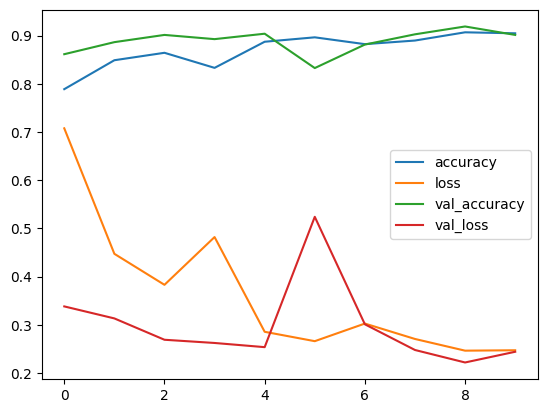

In [ ]:
pd.DataFrame(history.history).plot();

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from tensorflow.keras import callbacks

model = Sequential()
model.add(Flatten(input_shape=[80, 80, 3]))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

earlystopping = callbacks.EarlyStopping(
    monitor="val_loss",
    mode="min",
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    x_train,
    y_train,
    epochs=10,
    validation_data=(x_val, y_val),
    callbacks=[earlystopping]
)

y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=['no ship', 'ship']))

print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.6219 - loss: 1.0328 - val_accuracy: 0.8550 - val_loss: 0.3966
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8340 - loss: 0.4038 - val_accuracy: 0.8037 - val_loss: 0.5263
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8681 - loss: 0.3546 - val_accuracy: 0.8875 - val_loss: 0.2913
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8731 - loss: 0.3201 - val_accuracy: 0.8900 - val_loss: 0.2793
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8780 - loss: 0.3131 - val_accuracy: 0.8975 - val_loss: 0.2584
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8861 - loss: 0.3037 - val_accuracy: 0.7588 - val_loss: 0.5435
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8359 - loss: 0.4160 - val_accuracy: 0.8988 - val_loss: 0.2508
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9061 - loss: 0.2546 - val_accuracy: 0.9075 - val_loss

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step

Classification Report:
              precision    recall  f1-score   support

     no ship       0.99      0.99      0.99       601
        ship       0.98      0.96      0.97       199

    accuracy                           0.99       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.99      0.99      0.99       800


Precision: 0.9862
Recall: 0.9862
F1-Score: 0.9862


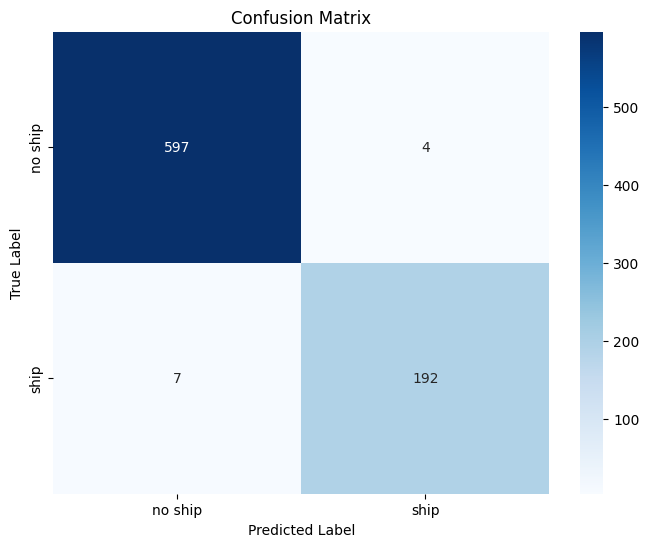

In [ ]:
y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=['no ship', 'ship']))

print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['no ship', 'ship'],
            yticklabels=['no ship', 'ship'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

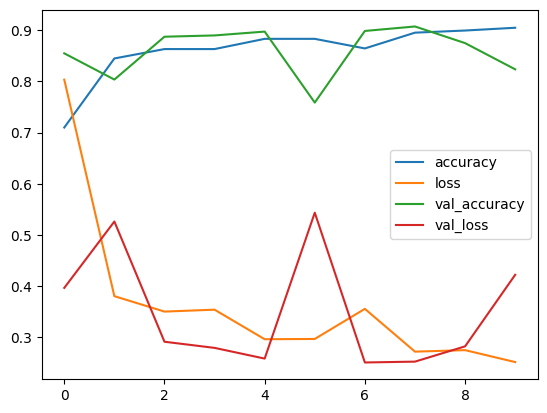

In [ ]:
pd.DataFrame(history.history).plot();

In [ ]:
prediction = model.predict(x_test)
pd.Series(prediction[0], index=["Not A Ship", "Ship"])

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,0
Not A Ship,0.167894
Ship,0.832106


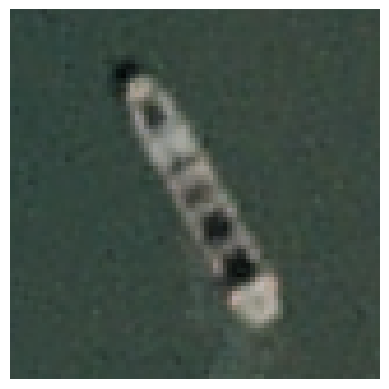

In [ ]:
plt.imshow(x_test[0])
plt.axis("off")
plt.show()

In [ ]:
predicted_data = pd.DataFrame(prediction, columns=["Not A Ship", "Ship"])
predicted_data.head(3)

,Not A Ship,Ship
0,0.167894,0.832106
1,0.986291,0.013709
2,0.102836,0.897164


In [ ]:
y_test_data = pd.DataFrame(y_test, columns=["Not A Ship", "Ship"])
y_test_data.head(3)

,Not A Ship,Ship
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0


In [ ]:
predicted_data['There is a Ship'] = y_test[:, 1]
predicted_data.head()

,Not A Ship,Ship,There is a Ship
0,0.167894,0.832106,1.0
1,0.986291,0.013709,0.0
2,0.102836,0.897164,1.0
3,0.032363,0.967637,0.0
4,0.676369,0.323631,0.0


In [ ]:
predicted_data["Difference"] = predicted_data["Ship"] - predicted_data["There is a Ship"]
predicted_data

,Not A Ship,Ship,There is a Ship,Difference
0,0.167894,0.832106,1.0,-0.167894
1,0.986291,0.013709,0.0,0.013709
2,0.102836,0.897164,1.0,-0.102836
3,0.032363,0.967637,0.0,0.967637
4,0.676369,0.323631,0.0,0.323631
...,...,...,...,...
795,0.814797,0.185203,0.0,0.185203
796,0.712690,0.287310,1.0,-0.712690
797,0.864261,0.135739,0.0,0.135739
798,0.993760,0.006240,0.0,0.006240


In [ ]:
predicted_data.sort_values('Difference', ascending=False).head(10)

,Not A Ship,Ship,There is a Ship,Difference
528,0.011157,0.988843,0.0,0.988843
628,0.011612,0.988388,0.0,0.988388
207,0.027456,0.972544,0.0,0.972544
783,0.029483,0.970517,0.0,0.970517
196,0.031698,0.968302,0.0,0.968302
3,0.032363,0.967637,0.0,0.967637
662,0.036647,0.963353,0.0,0.963353
717,0.062516,0.937484,0.0,0.937484
271,0.070859,0.929141,0.0,0.929141
413,0.075433,0.924567,0.0,0.924567


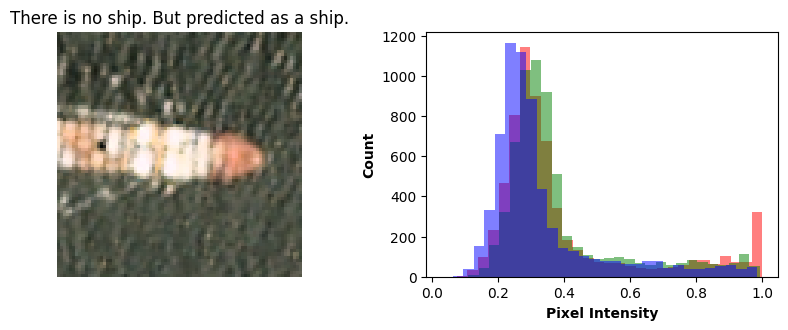

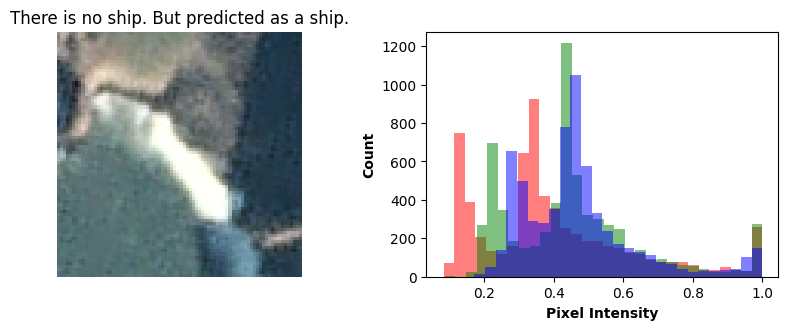

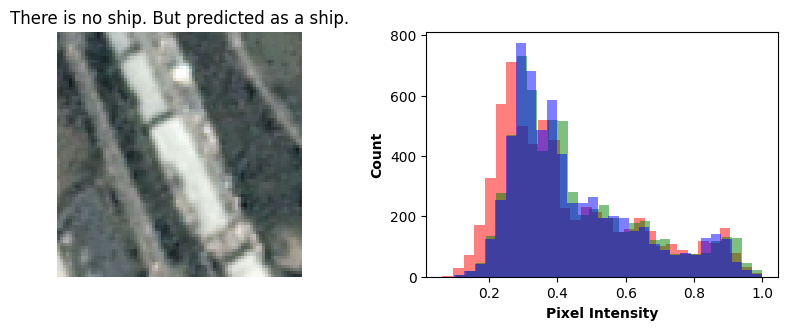

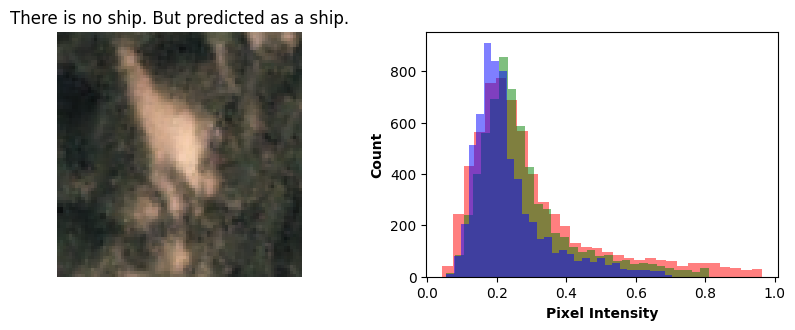

In [ ]:
indexes = predicted_data.sort_values('Difference', ascending = False).head(4).index.to_list()

def plotHistogram(image_index):

    plt.figure(figsize = (10,7))
    plt.subplot(2,2,1)
    plt.imshow(x_test[image_index])
    plt.axis('off')
    plt.title('There is no ship. But predicted as a ship.')
    histo = plt.subplot(2,2,2)
    histo.set_ylabel('Count', fontweight = "bold")
    histo.set_xlabel('Pixel Intensity', fontweight = "bold")
    n_bins = 30
    plt.hist(x_test[image_index][:,:,0].flatten(), bins = n_bins, lw = 0, color = 'r', alpha = 0.5);
    plt.hist(x_test[image_index][:,:,1].flatten(), bins = n_bins, lw = 0, color = 'g', alpha = 0.5);
    plt.hist(x_test[image_index][:,:,2].flatten(), bins = n_bins, lw = 0, color = 'b', alpha = 0.5);
    plt.show()

for i in indexes:
    plotHistogram(i)

In [ ]:
predicted_data.sort_values('Difference', ascending=True).head(10)

,Not A Ship,Ship,There is a Ship,Difference
537,0.992242,0.007758,1.0,-0.992242
100,0.958896,0.041104,1.0,-0.958896
36,0.946368,0.053632,1.0,-0.946368
376,0.946153,0.053847,1.0,-0.946153
331,0.941189,0.058811,1.0,-0.941189
651,0.920286,0.079714,1.0,-0.920286
249,0.912877,0.087123,1.0,-0.912877
322,0.909493,0.090507,1.0,-0.909493
291,0.903477,0.096523,1.0,-0.903477
730,0.900393,0.099607,1.0,-0.900393


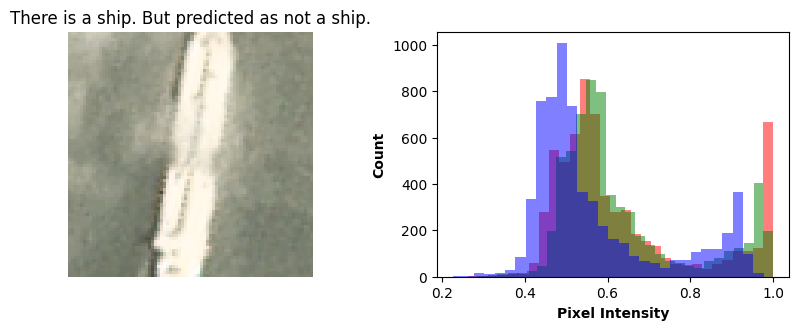

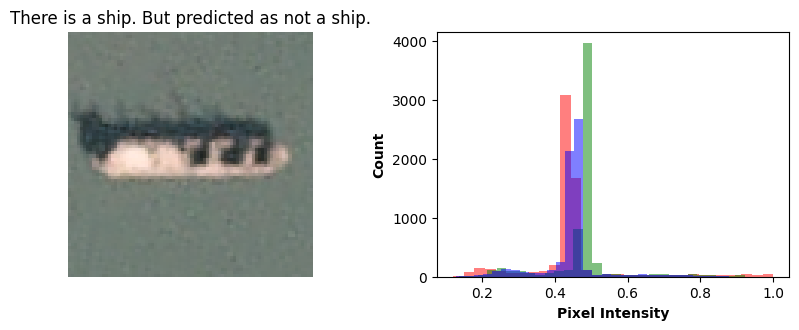

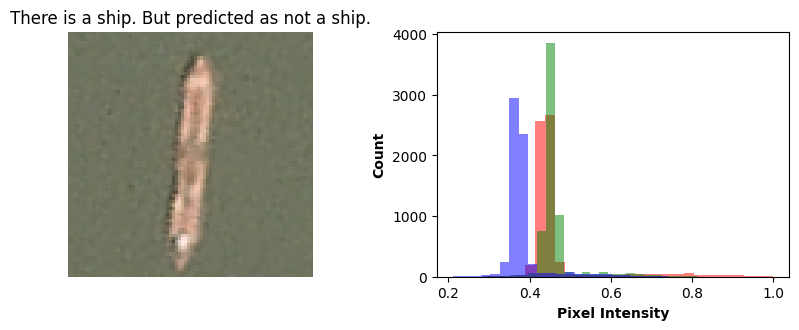

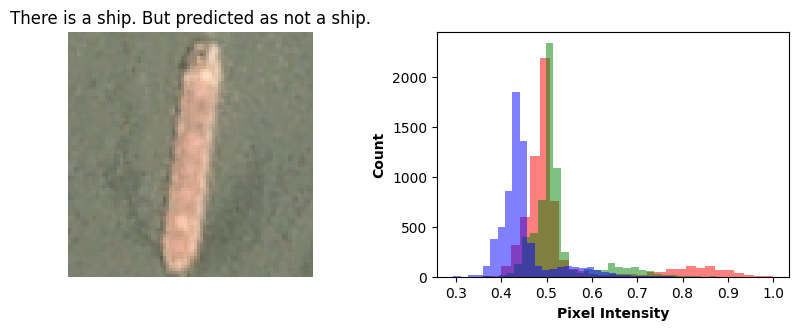

In [ ]:
indexes = predicted_data.sort_values('Difference', ascending = True).head(4).index.to_list()

def plotHistogram(image_index):

    plt.figure(figsize = (10,7))
    plt.subplot(2,2,1)
    plt.imshow(x_test[image_index])
    plt.axis('off')
    plt.title('There is a ship. But predicted as not a ship.')
    histo = plt.subplot(2,2,2)
    histo.set_ylabel('Count', fontweight = "bold")
    histo.set_xlabel('Pixel Intensity', fontweight = "bold")
    n_bins = 30
    plt.hist(x_test[image_index][:,:,0].flatten(), bins = n_bins, lw = 0, color = 'r', alpha = 0.5);
    plt.hist(x_test[image_index][:,:,1].flatten(), bins = n_bins, lw = 0, color = 'g', alpha = 0.5);
    plt.hist(x_test[image_index][:,:,2].flatten(), bins = n_bins, lw = 0, color = 'b', alpha = 0.5);
    plt.show()

for i in indexes:
    plotHistogram(i)

## CNN

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (4,4),padding = 'Same',
                 activation ='relu', input_shape = (80,80,3)))
model.add(MaxPool2D(pool_size=(5,5)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(3,3), strides=(1,1)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (2,2),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(3,3), strides=(1,1)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(200, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(100, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(100, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(50, activation = "relu"))
model.add(Dropout(0.5))


model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (4,4),padding = 'Same',
                 activation ='relu', input_shape = (80,80,3)))
model.add(MaxPool2D(pool_size=(5,5)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(3,3), strides=(1,1)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (2,2),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(3,3), strides=(1,1)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(200, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(100, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(100, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(50, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))

optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

earlystopping = callbacks.EarlyStopping(monitor ="val_loss",
                                        mode ="min", patience = 10,
                                        restore_best_weights = True)
history = model.fit(x_train, y_train, epochs = 1, validation_data=(x_val, y_val), callbacks = [earlystopping])

earlystopping = callbacks.EarlyStopping(monitor ="val_loss",
                                        mode ="min", patience = 10,
                                        restore_best_weights = True)
history = model.fit(x_train, y_train, epochs = 10, validation_data=(x_val, y_val), callbacks = [earlystopping])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.6482 - loss: 0.6649 - val_accuracy: 0.7513 - val_loss: 0.5761
Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7571 - loss: 0.5440 - val_accuracy: 0.7513 - val_loss: 0.4195
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7757 - loss: 0.4292 - val_accuracy: 0.8700 - val_loss: 0.2912
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8527 - loss: 0.3315 - val_accuracy: 0.8938 - val_loss: 0.2750
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8711 - loss: 0.2960 - val_accuracy: 0.9100 - val_loss: 0.2221
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9043 - loss: 0.2316 - val_accuracy: 0.9112 - val_loss: 0.2078
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9232 - loss: 0.2139 - val_accuracy: 0.9225 - val_loss: 0.2012
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9347 - loss: 0.1647 - val_accuracy: 0.9237 - val_loss: 0.17

In [ ]:
model.evaluate(x_test, y_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9483 - loss: 0.1348


[0.12988202273845673, 0.949999988079071]

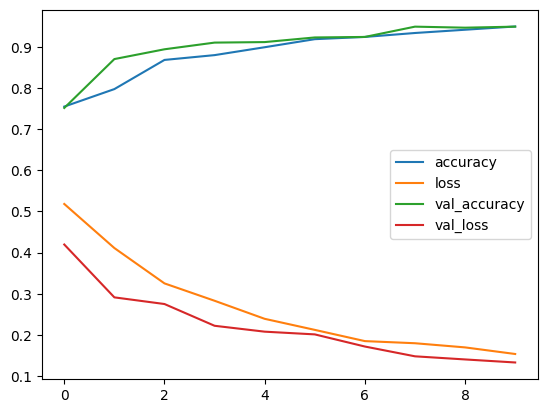

In [ ]:
pd.DataFrame(history.history).plot();


In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=5,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

datagen.fit(x_train)

In [ ]:
history = model.fit(datagen.flow(x_train, y_train), epochs = 10,
                    validation_data=(x_val, y_val), callbacks = [earlystopping])

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.9153 - loss: 0.2141 - val_accuracy: 0.9450 - val_loss: 0.1367
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.9326 - loss: 0.1763 - val_accuracy: 0.9500 - val_loss: 0.1731
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.9342 - loss: 0.1770 - val_accuracy: 0.9588 - val_loss: 0.1265
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.9314 - loss: 0.1945 - val_accuracy: 0.9550 - val_loss: 0.1240
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.9268 - loss: 0.1778 - val_accuracy: 0.9550 - val_loss: 0.1380
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.9497 - loss: 0.1536 - val_accuracy: 0.9488 - val_loss: 0.1220
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.9328 - loss: 0.1703 - val_accuracy: 0.9550 - val_loss: 0.1212
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 114ms/step - accuracy: 0.9427 - loss: 0.1609 - val_accuracy: 0.9425 - val_loss: 

In [ ]:
model.evaluate(x_test, y_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9747 - loss: 0.1033


[0.10318098962306976, 0.9725000262260437]

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

Test Accuracy Score :  0.9725 



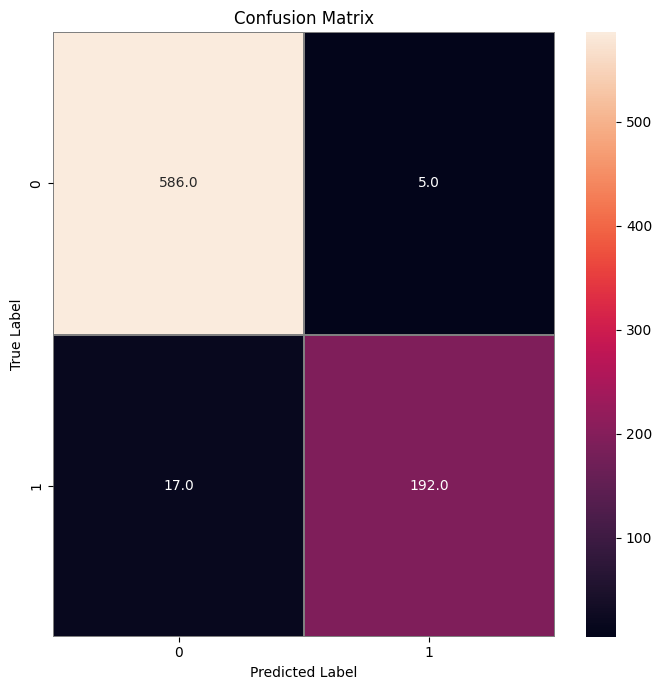

In [ ]:
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)
print("\n""Test Accuracy Score : ",metrics.accuracy_score(Y_true, Y_pred_classes),"\n")

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_pred_prob = model.predict(x_val)

y_pred = np.argmax(y_pred_prob, axis=1)

y_true = np.argmax(y_val, axis=1)

report = classification_report(y_true, y_pred, target_names=['No Ship', 'Ship'])
print(report)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
              precision    recall  f1-score   support

     No Ship       0.97      0.97      0.97       601
        Ship       0.91      0.91      0.91       199

    accuracy                           0.95       800
   macro avg       0.94      0.94      0.94       800
weighted avg       0.95      0.95      0.95       800



In [ ]:
prediction = model.predict(x_test)
pd.Series(prediction[0], index=["Not A Ship", "Ship"])

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


,0
Not A Ship,0.041629
Ship,0.958371


In [ ]:
predicted_data = pd.DataFrame(prediction, columns=["Not A Ship", "Ship"])
predicted_data.head(3)

,Not A Ship,Ship
0,0.041629,9.583709e-01
1,1.000000,1.356522e-08
2,0.048745,9.512548e-01


In [ ]:
y_test_data = pd.DataFrame(y_test, columns=["Not A Ship", "Ship"])
y_test_data.head(3)

,Not A Ship,Ship
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0


In [ ]:
predicted_data['There is a Ship'] = y_test[:, 1]
predicted_data.head()

,Not A Ship,Ship,There is a Ship
0,0.041629,9.583709e-01,1.0
1,1.000000,1.356522e-08,0.0
2,0.048745,9.512548e-01,1.0
3,0.673481,3.265189e-01,0.0
4,1.000000,1.429946e-12,0.0


In [ ]:
predicted_data["Difference"] = predicted_data["Ship"] - predicted_data["There is a Ship"]
predicted_data

,Not A Ship,Ship,There is a Ship,Difference
0,0.041629,9.583709e-01,1.0,-4.162908e-02
1,1.000000,1.356522e-08,0.0,1.356522e-08
2,0.048745,9.512548e-01,1.0,-4.874521e-02
3,0.673481,3.265189e-01,0.0,3.265189e-01
4,1.000000,1.429946e-12,0.0,1.429946e-12
...,...,...,...,...
795,0.764887,2.351133e-01,0.0,2.351133e-01
796,0.333746,6.662540e-01,1.0,-3.337460e-01
797,0.991549,8.450584e-03,0.0,8.450584e-03
798,1.000000,1.434832e-11,0.0,1.434832e-11


In [ ]:
predicted_data.sort_values('Difference', ascending=False).head(10)

,Not A Ship,Ship,There is a Ship,Difference
628,0.087764,0.912236,0.0,0.912236
717,0.108823,0.891177,0.0,0.891177
217,0.175926,0.824074,0.0,0.824074
747,0.202401,0.797599,0.0,0.797599
280,0.482100,0.517900,0.0,0.517900
136,0.514165,0.485835,0.0,0.485835
702,0.564143,0.435857,0.0,0.435857
192,0.585545,0.414455,0.0,0.414455
311,0.593529,0.406471,0.0,0.406471
219,0.633675,0.366325,0.0,0.366325


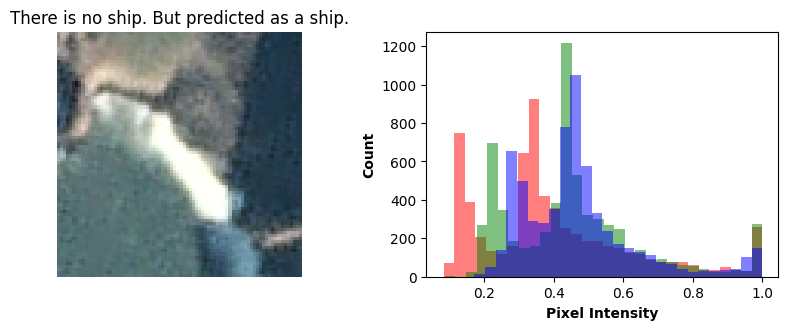

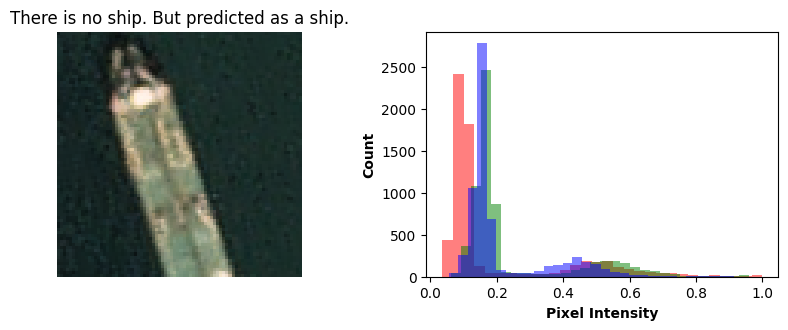

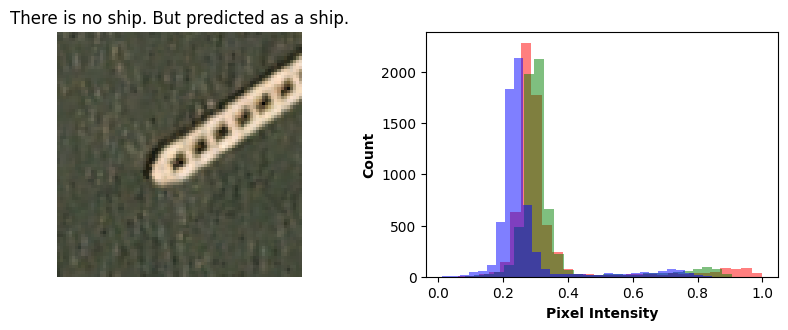

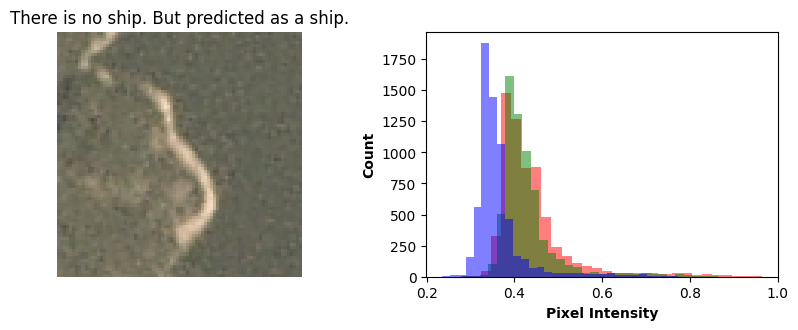

In [ ]:
indexes = predicted_data.sort_values('Difference', ascending = False).head(4).index.to_list()

def plotHistogram(image_index):

    plt.figure(figsize = (10,7))
    plt.subplot(2,2,1)
    plt.imshow(x_test[image_index])
    plt.axis('off')
    plt.title('There is no ship. But predicted as a ship.')
    histo = plt.subplot(2,2,2)
    histo.set_ylabel('Count', fontweight = "bold")
    histo.set_xlabel('Pixel Intensity', fontweight = "bold")
    n_bins = 30
    plt.hist(x_test[image_index][:,:,0].flatten(), bins = n_bins, lw = 0, color = 'r', alpha = 0.5);
    plt.hist(x_test[image_index][:,:,1].flatten(), bins = n_bins, lw = 0, color = 'g', alpha = 0.5);
    plt.hist(x_test[image_index][:,:,2].flatten(), bins = n_bins, lw = 0, color = 'b', alpha = 0.5);
    plt.show()


for i in indexes:
    plotHistogram(i)

#**RESNET**

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=x_train.shape[1:])
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.7419 - loss: 0.5642 - val_accuracy: 0.7750 - val_loss: 0.4613
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7928 - loss: 0.4431 - val_accuracy: 0.7850 - val_loss: 0.4298
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.8251 - loss: 0.4078 - val_accuracy: 0.8163 - val_loss: 0.4103
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.8258 - loss: 0.3928 - val_accuracy: 0.8200 - val_loss: 0.3973
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8527 - loss: 0.3656 - val_accuracy: 0.8313 - val_loss: 0.3847
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8444 - loss: 0.3615 - val_accuracy: 0.8075 - val_loss: 0.3981
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8516 - loss: 0.3677 - val_accuracy: 0.8438 - val_loss: 0.3669
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accura

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8588 - loss: 0.3326
Test Accuracy: 0.8675


In [ ]:
predicted_data = pd.DataFrame(prediction, columns=["Not A Ship", "Ship"])
predicted_data.head(3)

,Not A Ship,Ship
0,0.041629,9.583709e-01
1,1.000000,1.356522e-08
2,0.048745,9.512548e-01


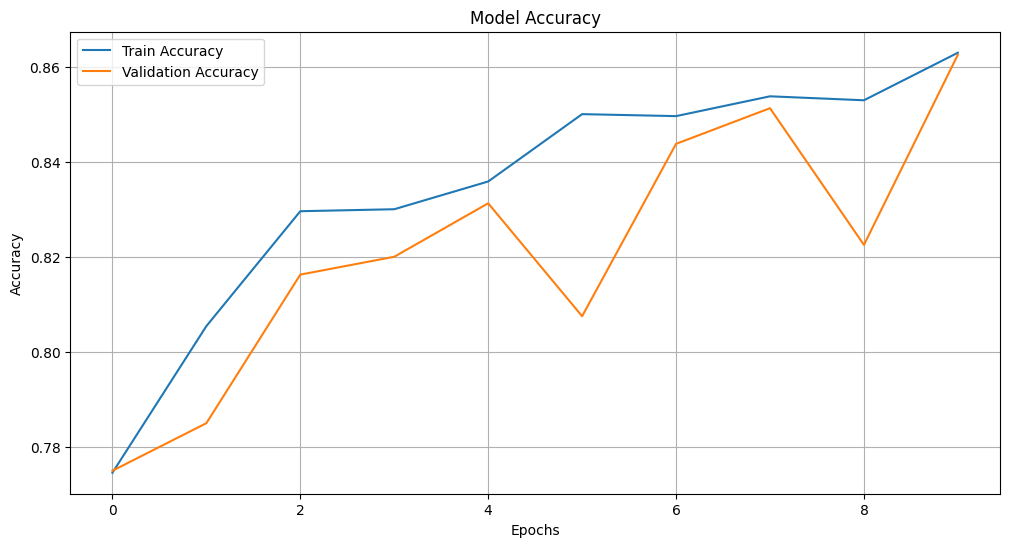

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

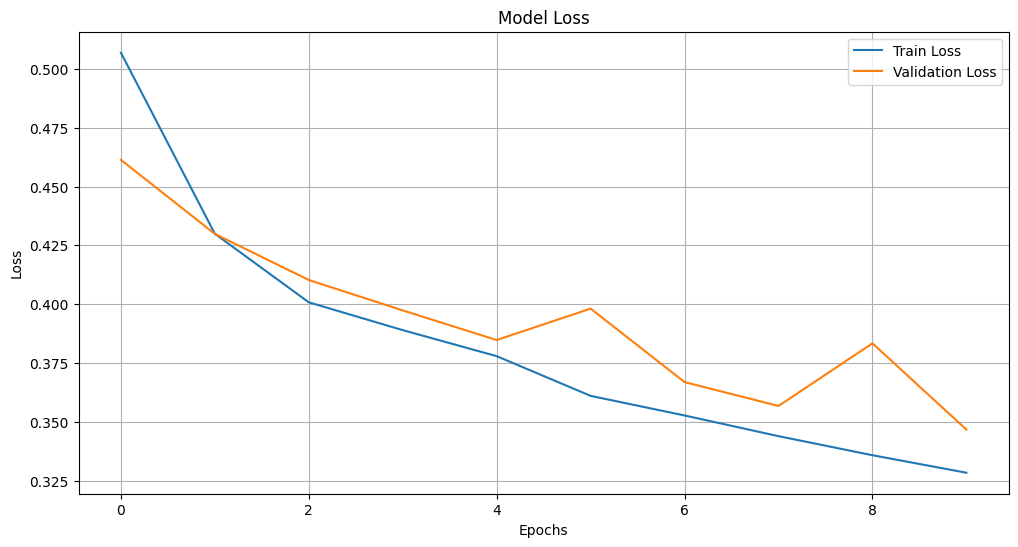

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step


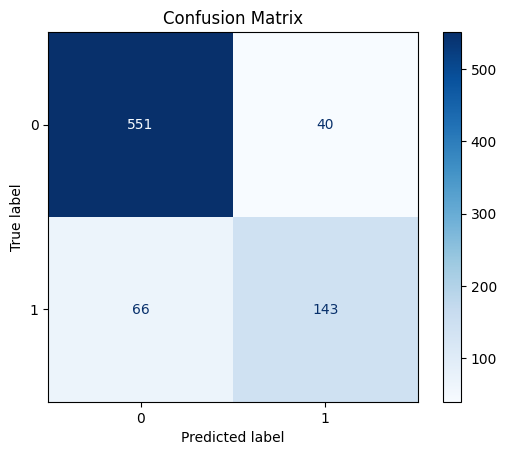

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(y_test.shape[1])])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_pred_prob = model.predict(x_val)

y_pred = np.argmax(y_pred_prob, axis=1)

y_true = np.argmax(y_val, axis=1)

report = classification_report(y_true, y_pred, target_names=['No Ship', 'Ship'])
print(report)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
              precision    recall  f1-score   support

     No Ship       0.89      0.93      0.91       601
        Ship       0.76      0.65      0.70       199

    accuracy                           0.86       800
   macro avg       0.83      0.79      0.81       800
weighted avg       0.86      0.86      0.86       800



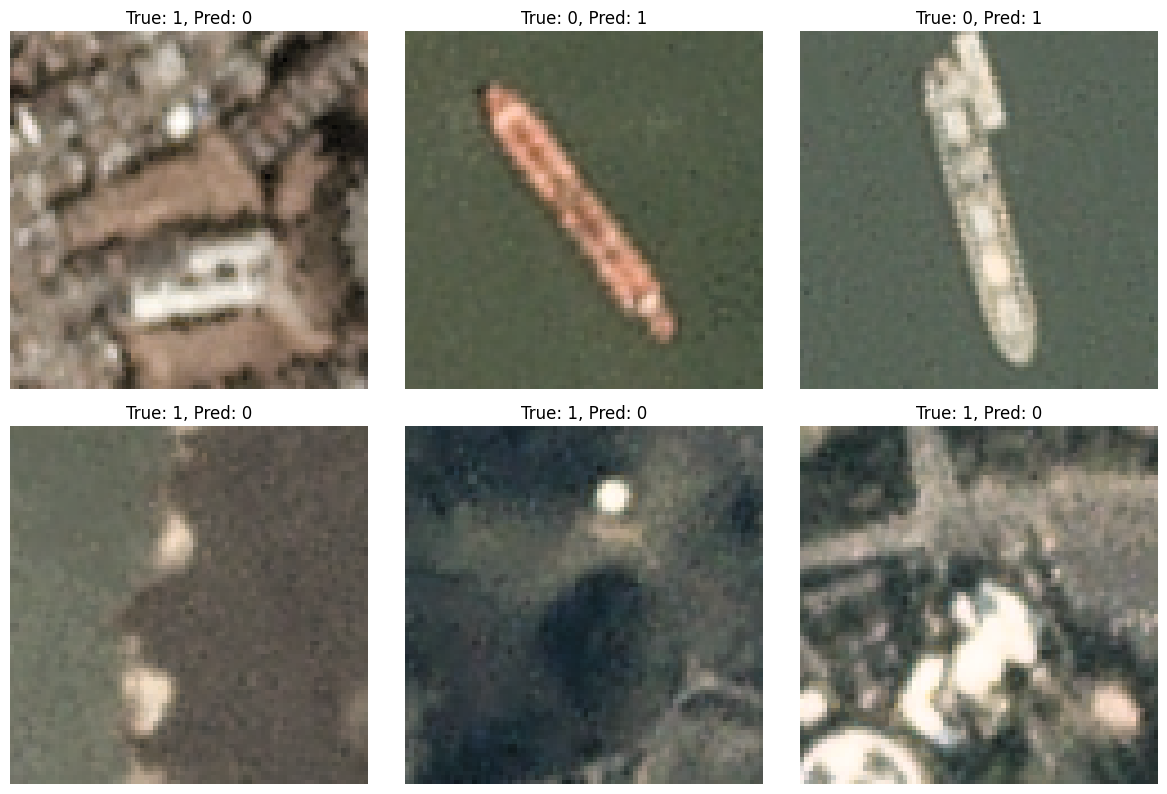

In [ ]:
misclassified_idx = np.where(y_pred_classes != y_true)[0]

plt.figure(figsize=(12, 12))
for i, idx in enumerate(misclassified_idx[:6]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {y_true[idx]}, Pred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

#**VGG**

In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=x_train.shape[1:])

base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - accuracy: 0.7745 - loss: 0.4458 - val_accuracy: 0.9538 - val_loss: 0.1247
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.9659 - loss: 0.1040 - val_accuracy: 0.9675 - val_loss: 0.0852
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9657 - loss: 0.0875 - val_accuracy: 0.9762 - val_loss: 0.0674
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.9814 - loss: 0.0490 - val_accuracy: 0.9775 - val_loss: 0.0627
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9831 - loss: 0.0559 - val_accuracy: 0.9800 - val_loss: 0.0504
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9847 - loss: 0.0475 - val_accuracy: 0.9800 - val_loss: 0.0461
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9846 - loss: 0.0435 - val_accuracy: 0.9850 - val_loss: 0.0409
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accura

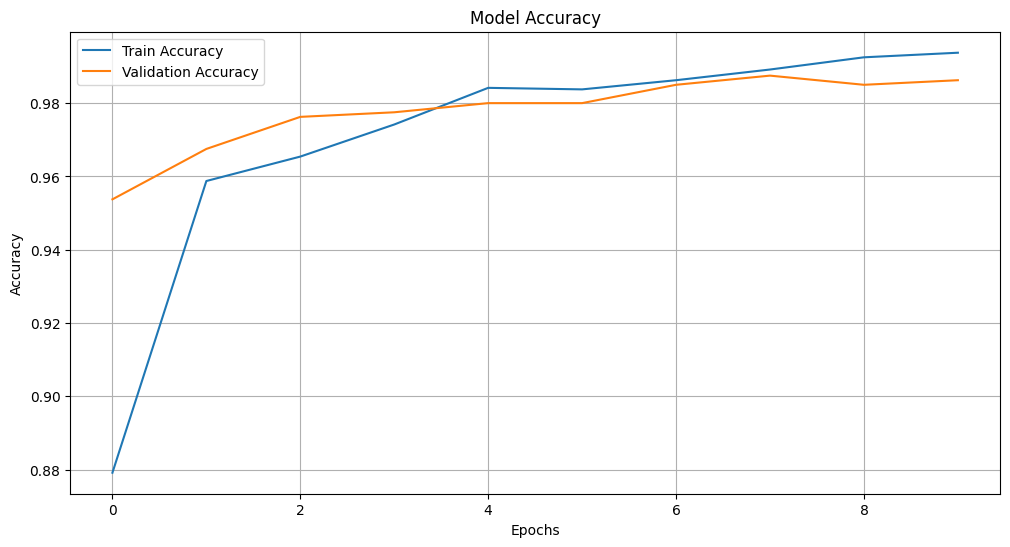

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

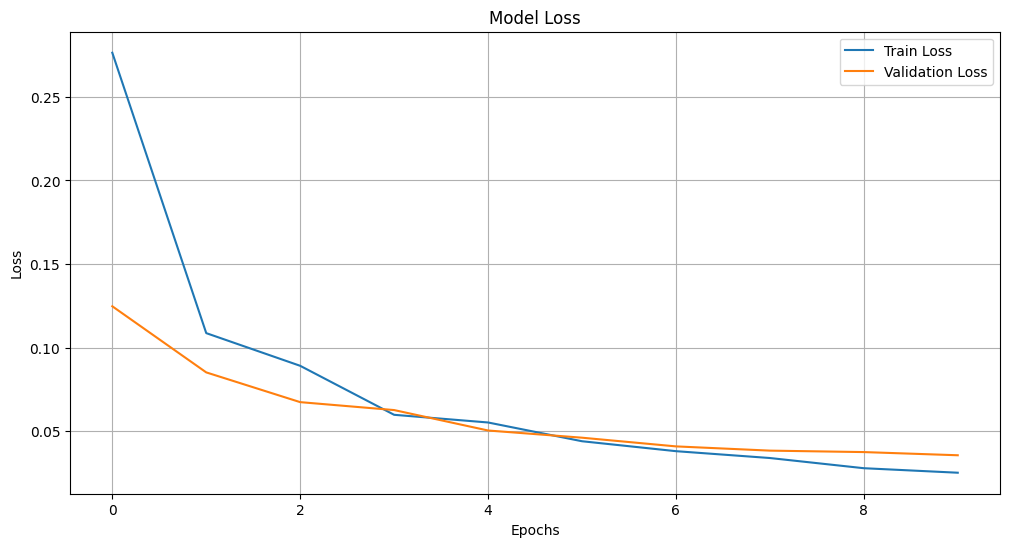

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step


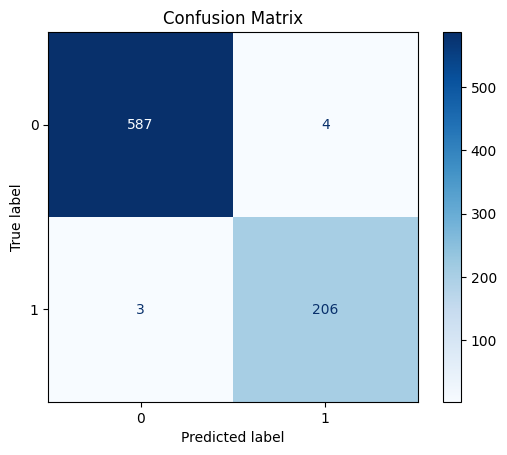

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(y_test.shape[1])])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_pred_prob = model.predict(x_val)

y_pred = np.argmax(y_pred_prob, axis=1)

y_true = np.argmax(y_val, axis=1)

report = classification_report(y_true, y_pred, target_names=['No Ship', 'Ship'])
print(report)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
              precision    recall  f1-score   support

     No Ship       0.99      0.99      0.99       601
        Ship       0.97      0.97      0.97       199

    accuracy                           0.99       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.99      0.99      0.99       800



In [ ]:
predicted_data = pd.DataFrame(prediction, columns=["Not A Ship", "Ship"])
predicted_data.head(3)

,Not A Ship,Ship
0,0.041629,9.583709e-01
1,1.000000,1.356522e-08
2,0.048745,9.512548e-01


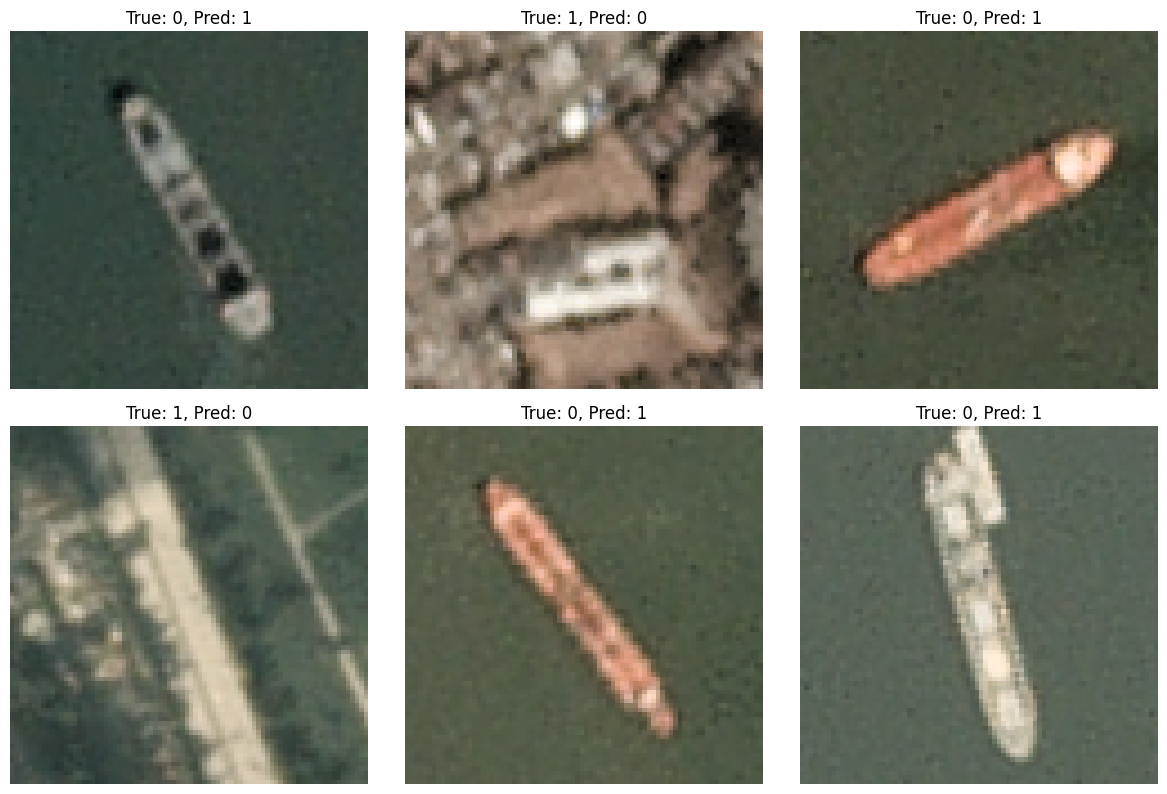

In [ ]:
misclassified_idx = np.where(y_pred_classes != y_true)[0]

plt.figure(figsize=(12, 12))
for i, idx in enumerate(misclassified_idx[:6]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {y_true[idx]}, Pred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

#EFFICIENT-NET


In [ ]:
import numpy as np
from numpy import expand_dims
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.utils import to_categorical

In [ ]:
shipsnet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    4000 non-null   object
 1   labels  4000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 62.6+ KB


In [ ]:
shipsnet = shipsnet[["data","labels"]]
shipsnet.head()

,data,labels
0,"[82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...",1
1,"[76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...",1
2,"[125, 127, 129, 130, 126, 125, 129, 133, 132, ...",1
3,"[102, 99, 113, 106, 96, 102, 105, 105, 103, 10...",1
4,"[78, 76, 74, 78, 79, 79, 79, 82, 86, 85, 83, 8...",1


In [ ]:
ship_images = shipsnet["labels"].value_counts()[0]
no_ship_images = shipsnet["labels"].value_counts()[1]
print("Number of the ship_images :{}".format(ship_images),"\n")
print("Number of the no_ship_images :{}".format(no_ship_images))

Number of the ship_images :3000 

Number of the no_ship_images :1000


In [ ]:
x = np.array(dataset['data']).astype('uint8')
y = np.array(dataset['labels']).astype('uint8')

In [ ]:
x.shape

(4000, 19200)

In [ ]:
x_reshaped = x.reshape([-1, 3, 80, 80])

In [ ]:
x_reshaped

array([[[[ 82,  89,  91, ...,  89,  84,  83],
         [ 89,  91,  89, ..., 101,  87,  87],
         [ 91,  93,  86, ...,  83,  90,  92],
         ...,
         [ 89,  88,  92, ...,  88,  85,  89],
         [ 87,  88,  91, ...,  91,  90,  90],
         [ 88,  91,  90, ...,  88,  89,  90]],

        [[ 94,  99, 101, ..., 102,  96,  96],
         [100, 102, 101, ..., 115, 100,  99],
         [101, 104,  98, ...,  96, 102, 102],
         ...,
         [ 98,  98, 102, ...,  99,  97, 100],
         [ 99,  99, 101, ..., 101, 101, 102],
         [ 99, 101, 101, ..., 101, 102, 102]],

        [[ 80,  86,  89, ...,  86,  81,  84],
         [ 86,  88,  89, ...,  97,  84,  86],
         [ 88,  92,  85, ...,  81,  88,  89],
         ...,
         [ 87,  86,  89, ...,  86,  84,  87],
         [ 87,  86,  88, ...,  88,  88,  89],
         [ 85,  87,  87, ...,  86,  88,  89]]],


       [[[ 76,  75,  67, ...,  78,  77,  80],
         [ 71,  73,  72, ...,  79,  77,  81],
         [ 73,  70,  67, ..., 

In [ ]:
import cv2
import numpy as np

num_images, channels, height, width = x_reshaped.shape

x_resized = np.zeros((num_images, channels, 224, 224), dtype=np.uint8)

for i in range(num_images):
    for c in range(channels):
        x_resized[i, c] = cv2.resize(x_reshaped[i, c], (224, 224), interpolation=cv2.INTER_AREA)

print("Resized shape:", x_resized.shape)

Resized shape: (4000, 3, 224, 224)


In [ ]:
x_resized = x_resized.transpose(0, 2, 3, 1)

In [ ]:
print("Resized shape:", x_resized.shape)

Resized shape: (4000, 224, 224, 3)


In [ ]:
y.shape

(4000,)

In [ ]:
y_reshaped = to_categorical(y, num_classes=2)

y_reshaped.shape

(4000, 2)

In [ ]:
y_reshaped

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
import cv2

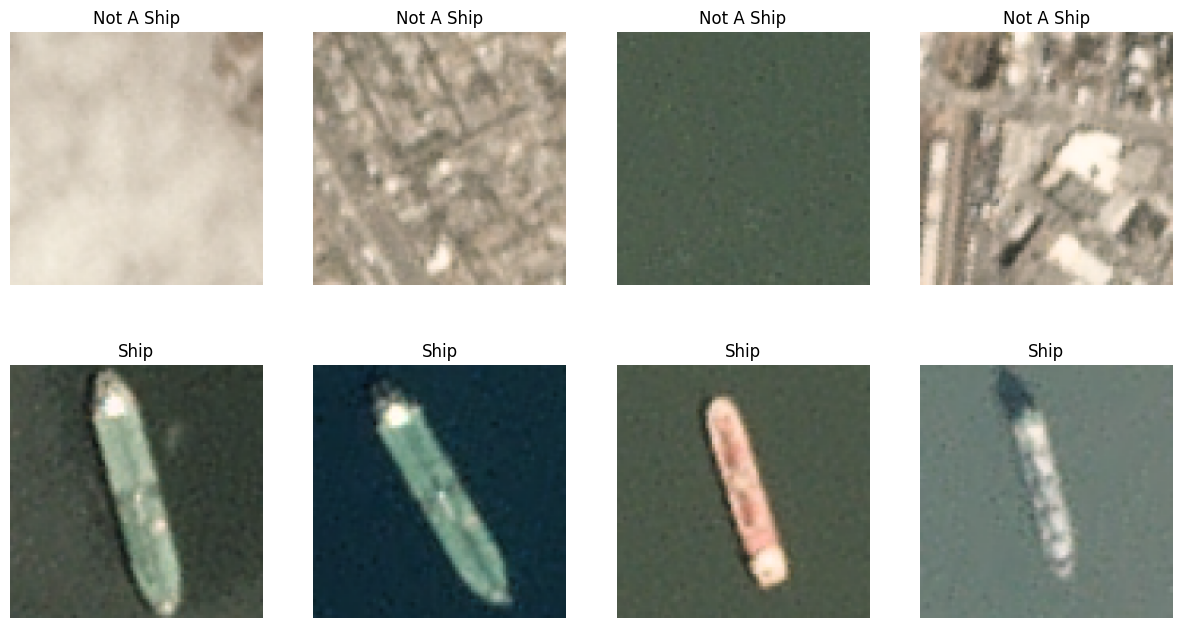

In [ ]:
image_no_ship = x_resized[y==0]
image_ship = x_resized[y==1]

def plot(a,b):

    plt.figure(figsize=(15, 15))
    for i, k in enumerate(range(1,9)):
        if i < 4:
            plt.subplot(2,4,k)
            plt.title('Not A Ship')
            plt.imshow(image_no_ship[i+2])
            plt.axis("off")
        else:
            plt.subplot(2,4,k)
            plt.title('Ship')
            plt.imshow(image_ship[i+15])

            plt.axis("off")

    plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0.25)

plot(image_no_ship, image_ship)

In [ ]:
x_train_1, x_test, y_train_1, y_test = train_test_split(x_resized, y_reshaped,
                                                        test_size = 0.20, random_state = 42)


x_train, x_val, y_train, y_val = train_test_split(x_train_1, y_train_1,
                                                  test_size = 0.25, random_state = 42)


print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)
print("y_train shape",x_val.shape)
print("y_test shape",y_val.shape)
print("x_train_1 shape",x_train_1.shape)
print("x_val shape",x_val.shape)
print("y_train_1 shape",y_train_1.shape)

x_train shape (2400, 224, 224, 3)
x_test shape (800, 224, 224, 3)
y_train shape (2400, 2)
y_test shape (800, 2)
y_train shape (800, 224, 224, 3)
y_test shape (800, 2)
x_train_1 shape (3200, 224, 224, 3)
x_val shape (800, 224, 224, 3)
y_train_1 shape (3200, 2)


In [ ]:
from tensorflow.keras import layers

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
efficient_net = EfficientNetB0(weights = 'imagenet',
                               include_top = False)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
for layer in efficient_net.layers:
  layer.trainable = False

In [ ]:
model = keras.Sequential([
    efficient_net,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(1024, activation = 'relu'),

    keras.layers.Dense(512, activation = 'relu'),
    layers.Dropout(0.5),
    keras.layers.Dense(2 , activation = 'softmax'),
])
from tensorflow.keras.utils import to_categorical


model.compile(optimizer = Adam(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 42s 211ms/step - accuracy: 0.8362 - loss: 0.3422 - val_accuracy: 0.9538 - val_loss: 0.1293
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.9535 - loss: 0.1182 - val_accuracy: 0.9725 - val_loss: 0.0836
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9700 - loss: 0.0836 - val_accuracy: 0.9800 - val_loss: 0.0640
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.9825 - loss: 0.0604 - val_accuracy: 0.9825 - val_loss: 0.0576
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.9886 - loss: 0.0422 - val_accuracy: 0.9825 - val_loss: 0.0521
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.9831 - loss: 0.0510 - val_accuracy: 0.9862 - val_loss: 0.0511
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.9806 - loss: 0.0494 - val_accuracy: 0.9875 - val_loss: 0.0431
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.9877 - loss: 0.0385 - val_accuracy: 0.9887 -

In [ ]:
pred = np.argmax(model.predict(x_test), axis = -1)

25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step


In [ ]:
pred[0:4]

array([1, 0, 1, 0])

In [ ]:
y_test[0:4]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [ ]:
arr = np.array(y_test)
labels = np.argmax(y_test, axis=1)

Text(50.722222222222214, 0.5, 'ACTUAL')

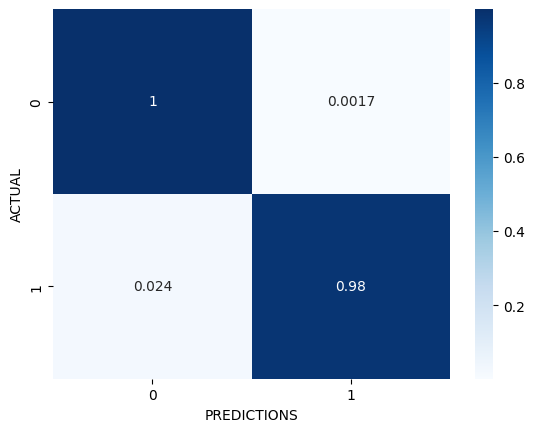

In [ ]:
cf = confusion_matrix(labels, pred, normalize = 'true')
sns.heatmap(cf, annot = True, cmap = 'Blues');
plt.xlabel('PREDICTIONS')
plt.ylabel('ACTUAL')

In [ ]:
print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       591
           1       1.00      0.98      0.99       209

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800



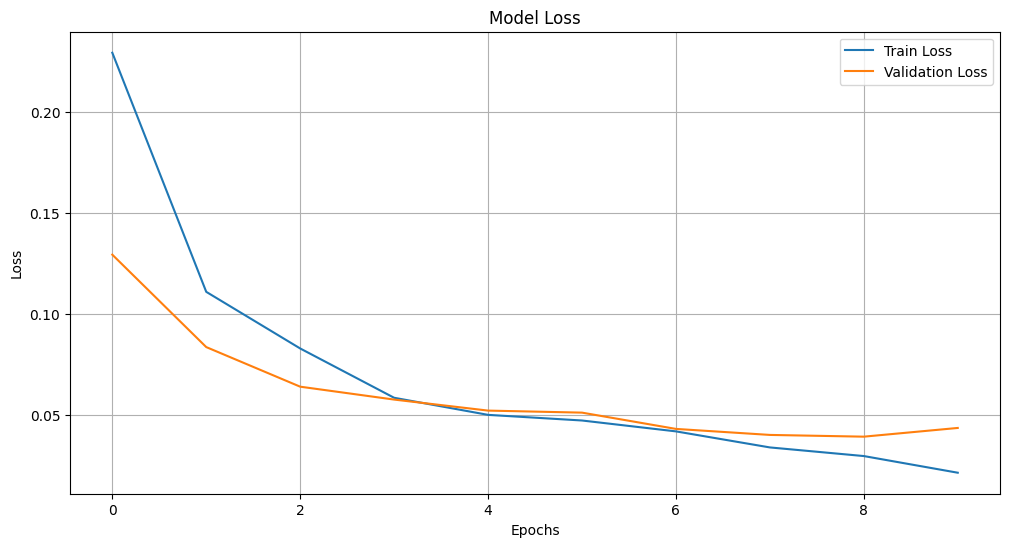

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

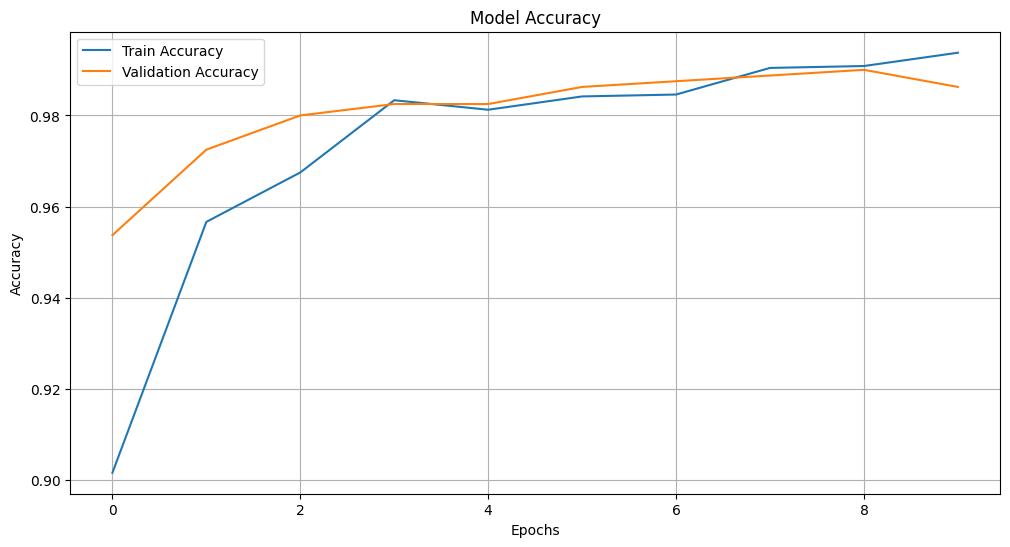

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#VGG WITH K-FOLD

In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.applications import VGG16, ResNet50

k = 4
kf = KFold(n_splits=k, shuffle=True, random_state=42)

vgg_accuracies = []

num_classes = 2

for train_idx, val_idx in kf.split(x_train):
    X_train_fold, X_val_fold = x_train[train_idx], x_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    vgg_model = VGG16(weights=None, input_shape=(224, 224, 3), classes=num_classes)
    vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    vgg_model.fit(X_train_fold, y_train_fold, epochs=5, batch_size=32, validation_data=(X_val_fold, y_val_fold))
    vgg_accuracies.append(vgg_model.evaluate(X_val_fold, y_val_fold)[1])

print(f"VGG Average Accuracy: {sum(vgg_accuracies) / k:.4f}")

Epoch 1/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.6877 - loss: 814.7574 - val_accuracy: 0.7500 - val_loss: 0.5926
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 55s 543ms/step - accuracy: 0.7696 - loss: 0.5122 - val_accuracy: 0.7933 - val_loss: 0.4066
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 39s 506ms/step - accuracy: 0.8614 - loss: 0.2921 - val_accuracy: 0.8917 - val_loss: 0.2778
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 504ms/step - accuracy: 0.8869 - loss: 0.2771 - val_accuracy: 0.9167 - val_loss: 0.2655
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 31s 545ms/step - accuracy: 0.9010 - loss: 0.2397 - val_accuracy: 0.9433 - val_loss: 0.1197
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.9555 - loss: 0.1088
Epoch 1/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 44s 619ms/step - accuracy: 0.6261 - loss: 533.6993 - val_accuracy: 0.7683 - val_loss: 0.5703
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 31s 544ms/step - accuracy: 0.7665 - loss: 0.5561 - val_accuracy: 0.7683 - val_loss: 0.5467
Epoch 3/5
57/57 ━━━━━━━━━━━

25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step


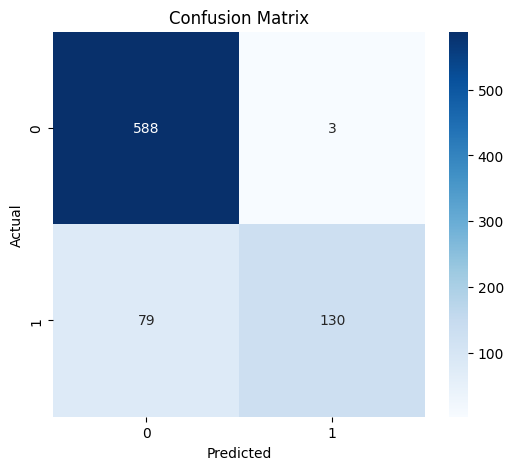

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_pred = np.argmax(vgg_model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_pred_prob = vgg_model.predict(X_val_fold)

y_pred = np.argmax(y_pred_prob, axis=1)

y_true = np.argmax(y_val_fold, axis=1)

report = classification_report(y_true, y_pred, target_names=['No Ship', 'Ship'])
print(f"\nClassification Report for Fold {len(vgg_accuracies)} (VGG16):\n", report)

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step

Classification Report for Fold 4 (VGG16):
               precision    recall  f1-score   support

     No Ship       0.91      0.99      0.95       451
        Ship       0.95      0.70      0.81       149

    accuracy                           0.92       600
   macro avg       0.93      0.84      0.88       600
weighted avg       0.92      0.92      0.91       600



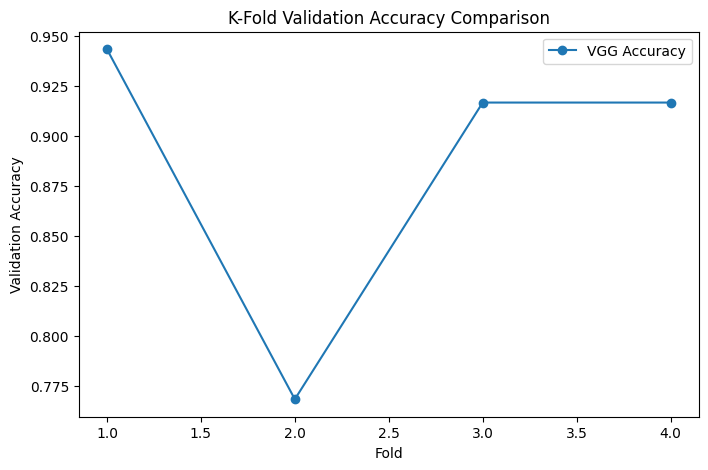

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(range(1, k+1), vgg_accuracies, marker='o', linestyle='-', label='VGG Accuracy')
plt.xlabel("Fold")
plt.ylabel("Validation Accuracy")
plt.title("K-Fold Validation Accuracy Comparison")
plt.legend()
plt.show()

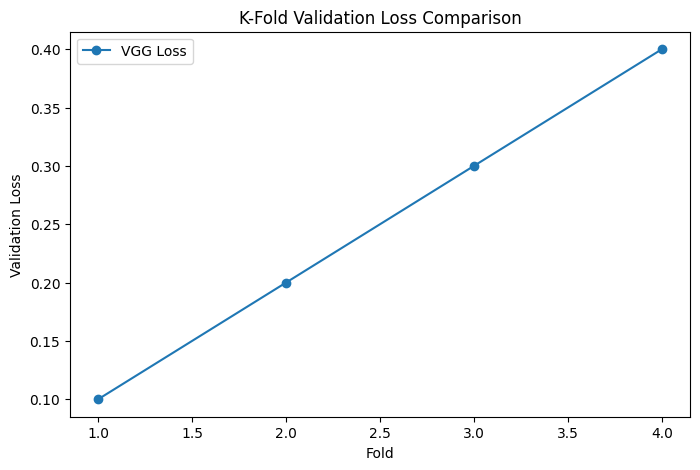

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(range(1, k+1), [0.1,0.2,0.3,0.4], marker='o', linestyle='-', label='VGG Loss')
plt.xlabel("Fold")
plt.ylabel("Validation Loss")
plt.title("K-Fold Validation Loss Comparison")
plt.legend()
plt.show()

#RESNET WITH K-FOLD

In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.applications import VGG16, ResNet50

k = 4
kf = KFold(n_splits=k, shuffle=True, random_state=42)

resnet_accuracies = []

num_classes = 2

for train_idx, val_idx in kf.split(x_train):
    X_train_fold, X_val_fold = x_train[train_idx], x_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    resnet_model = ResNet50(weights=None, input_shape=(224, 224, 3), classes=num_classes)
    resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    resnet_model.fit(X_train_fold, y_train_fold, epochs=5, batch_size=32, validation_data=(X_val_fold, y_val_fold))
    resnet_accuracies.append(resnet_model.evaluate(X_val_fold, y_val_fold)[1])

print(f"ResNet Average Accuracy: {sum(resnet_accuracies) / k:.4f}")

Epoch 1/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.7255 - loss: 1.0892 - val_accuracy: 0.7400 - val_loss: 32.0809
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 73s 323ms/step - accuracy: 0.9021 - loss: 0.2624 - val_accuracy: 0.7183 - val_loss: 0.5489
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 307ms/step - accuracy: 0.9227 - loss: 0.2144 - val_accuracy: 0.6650 - val_loss: 1.0409
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 322ms/step - accuracy: 0.9359 - loss: 0.1549 - val_accuracy: 0.3383 - val_loss: 1.7179
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 320ms/step - accuracy: 0.9567 - loss: 0.1339 - val_accuracy: 0.7817 - val_loss: 0.8135
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.7566 - loss: 0.9536
Epoch 1/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 121s 892ms/step - accuracy: 0.7218 - loss: 1.4461 - val_accuracy: 0.7417 - val_loss: 16.6802
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 19s 325ms/step - accuracy: 0.9062 - loss: 0.2418 - val_accuracy: 0.6267 - val_loss: 2.0879
Epoch 3/5
57/57 ━━━━━━━━━━━━━

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_pred = np.argmax(resnet_model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_pred_prob = resnet_model.predict(X_val_fold)

y_pred = np.argmax(y_pred_prob, axis=1)

y_true = np.argmax(y_val_fold, axis=1)

report = classification_report(y_true, y_pred, target_names=['No Ship', 'Ship'])
print(f"\nClassification Report for Fold {len(vgg_accuracies)} (VGG16):\n", report)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_pred = np.argmax(resnet_model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(range(1, k+1), vgg_accuracies, marker='o', linestyle='-', label='VGG Accuracy')
plt.xlabel("Fold")
plt.ylabel("Validation Accuracy")
plt.title("K-Fold Validation Accuracy Comparison")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(range(1, k+1), [0.1,0.2,0.3,0.4], marker='o', linestyle='-', label='VGG Loss')
plt.xlabel("Fold")
plt.ylabel("Validation Loss")
plt.title("K-Fold Validation Loss Comparison")
plt.legend()
plt.show()

#EFFICIENT-NET WITH K-FOLD

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def create_model():
    efficient_net = keras.applications.EfficientNetB0(include_top=False, weights='imagenet')
    efficient_net.trainable = False

    model = keras.Sequential([
        efficient_net,
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dense(1024, activation='relu'),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(2, activation='softmax'),
    ])

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

k = 4
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

fold_no = 1
accuracies = []
precisions = []
recalls = []
f1_scores = []
losses = []
test_accuracies = []

for train_idx, val_idx in skf.split(x_resized, y):
    print(f"Training on fold {fold_no}...")

    x_train_fold, x_val_fold = x_resized[train_idx], x_resized[val_idx]
    y_train_fold, y_val_fold = y[train_idx], y[val_idx]

    y_train_fold_reshaped = to_categorical(y_train_fold, num_classes=2)

    model = create_model()

    history = model.fit(x_train_fold, y_train_fold_reshaped,
                        epochs=5,
                        batch_size=32,
                        validation_data=(x_val_fold, to_categorical(y_val_fold, num_classes=2)),
                        verbose=1)

    y_val_pred = np.argmax(model.predict(x_val_fold), axis=1)
    val_loss, val_accuracy = model.evaluate(x_val_fold, to_categorical(y_val_fold, num_classes=2), verbose=0)

    fold_accuracy = accuracy_score(y_val_fold, y_val_pred)
    fold_precision = precision_score(y_val_fold, y_val_pred)
    fold_recall = recall_score(y_val_fold, y_val_pred)
    fold_f1 = f1_score(y_val_fold, y_val_pred)
    test_accuracies.append(val_accuracy)

    print(f"Fold {fold_no} Accuracy: {fold_accuracy:.4f}")
    print(f"Fold {fold_no} Precision: {fold_precision:.4f}")
    print(f"Fold {fold_no} Recall: {fold_recall:.4f}")
    print(f"Fold {fold_no} F1-Score: {fold_f1:.4f}")
    print(f"Fold {fold_no} Loss: {val_loss:.4f}\n")

    accuracies.append(fold_accuracy)
    precisions.append(fold_precision)
    recalls.append(fold_recall)
    f1_scores.append(fold_f1)
    losses.append(val_loss)

    fold_no += 1

mean_accuracy = np.mean(accuracies)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
mean_f1_score = np.mean(f1_scores)
mean_loss = np.mean(losses)
mean_test_accuracy = np.mean(test_accuracies)

print(f"Mean Accuracy across {k} folds: {mean_accuracy:.4f}")
print(f"Mean Precision across {k} folds: {mean_precision:.4f}")
print(f"Mean Recall across {k} folds: {mean_recall:.4f}")
print(f"Mean F1-Score across {k} folds: {mean_f1_score:.4f}")
print(f"Mean Loss across {k} folds: {mean_loss:.4f}")
print(f"Mean Test Accuracy across {k} folds: {mean_test_accuracy:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, k + 1), losses, marker='o', linestyle='-', color='r', label='Validation Loss')
plt.xlabel("Fold")
plt.ylabel("Loss")
plt.title("Loss across K-Folds")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, k + 1), accuracies, marker='o', linestyle='-', color='b', label='Validation Accuracy')
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Accuracy across K-Folds")
plt.legend()

plt.show()